In [1]:
import numpy as np

In [2]:
sentences = [['you', 'eat', 'fish'], ['you', 'fish', 'eat'], ['eat', 'fish']]
tags = [['D', 'C', 'D'], ['D', 'D', 'C'], ['C', 'D']]
word_dict = {'you': 0, 'eat': 1, 'fish': 2}
tag_dict = {'C': 0, 'D': 1}

In [3]:
tag_num = len(tag_dict)
word_num = len(word_dict)

init = np.zeros(tag_num)
transition = np.zeros((tag_num, tag_num))
emission = np.zeros((tag_num, word_num))

In [4]:
tag_init = tag_dict.copy()

for tag in tag_init.keys():
    tag_init[tag] = 0
    for i in range(len(tags)):
        if tags[i][0] == tag: 
            tag_init[tag] += 1
    tag_init[tag] += 1
    
sum_init = sum(tag_init.values())
i = 0
for tag in tag_init.keys():
    init[i] = tag_init[tag] / sum_init
    i += 1

In [5]:
init

array([0.4, 0.6])

In [6]:
for i in range(len(tags)):
    for j in range(1, len(tags[i])):
        l2_idx = tag_dict[tags[i][j]]
        l1_idx = tag_dict[tags[i][j - 1]]
        transition[l1_idx][l2_idx] += 1

transition += 1
for i in range(len(transition)):
    transition[i] = transition[i] / np.sum(transition[i])

In [7]:
transition

array([[0.25, 0.75],
       [0.6 , 0.4 ]])

In [9]:
for i in range(len(tags)):
    for j in range(len(tags[i])):
        x_idx = word_dict[sentences[i][j]]
        y_idx = tag_dict[tags[i][j]]
        emission[y_idx][x_idx] += 1
        
emission += 1
for i in range(len(emission)):
    emission[i] = emission[i] / np.sum(emission[i])

In [10]:
emission

array([[0.16666667, 0.66666667, 0.16666667],
       [0.375     , 0.125     , 0.5       ]])

forward & backward

In [1]:
import numpy as np

In [2]:
emission = np.array([[0.16666667, 0.66666667, 0.16666667], [0.375     , 0.125     , 0.5       ]])
transition = np.array([[0.25, 0.75], [0.6 , 0.4 ]])
init = np.array([0.4, 0.6])

sentences = [['fish', 'eat', 'you']]
tags = [['C', 'C', 'C']]

word_dict = {'you': 0, 'eat': 1, 'fish': 2}
tag_dict = {'C': 0, 'D': 1}

tag_num = len(tag_dict)
word_num = len(word_dict)

In [5]:
def logsumexp(array):
    return np.max(array) + np.log(np.sum(np.exp(array - np.max(array))))

In [4]:
# forward
# a1,a2...]T
for sentence in sentences:
    alpha = np.zeros((len(sentence), tag_num))
    for i in range(1, len(sentence)+1):
        if i == 1:
            alpha[0] = np.log(init) + np.log(emission[:, word_dict[sentence[0]]])
        else:
            for j in range(1, tag_num+1):
                new = np.zeros(tag_num)
                for k in range(1, tag_num+1):
                    new[k-1] = alpha[i-2, k-1] + np.log(transition[k-1, j-1])
                alpha[i-1, j-1] = np.log(emission[j-1, word_dict[sentence[i-1]]]) + logsumexp(new)

In [5]:
np.log(np.sum(np.exp(alpha[-1])))

-3.0438629232330747

In [7]:
beta

array([[-2.56061846, -1.95427839],
       [-1.13036098, -1.38629435],
       [ 0.        ,  0.        ]])

In [6]:
# beta = [b1, b2, ...].T
# backward
for sentence in sentences:
    beta = np.zeros((len(sentence), tag_num))
    for i in range(len(sentence)):
        if i != 0:
            for j in range(tag_num):
                new = np.zeros(tag_num)
                for k in range(tag_num):
                    o = np.log(transition[j, k])
                    p = emission[k, word_dict[sentence[len(sentence) - i]]]
                    new[k] = beta[len(sentence) - i, k] + o + np.log(p)
                beta[len(sentence) - i - 1, j] = logsumexp(new)

In [7]:
beta

array([[-2.56061846, -1.95427839],
       [-1.13036098, -1.38629435],
       [ 0.        ,  0.        ]])

In [1]:
import numpy as np

path_index2tag = r'C:\Users\Zheyi\Documents\CMU\10601\hw7\handout\index2tag.txt'
tag = np.genfromtxt(path_index2tag, delimiter='\n', dtype='str')

In [3]:
tag

array(['B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG',
       'I-PER', 'O'], dtype='<U6')

In [8]:
sentences = [['you', 'eat', 'fish'], ['you', 'fish', 'eat'], ['eat', 'fish']]
sentences[0:2]

[['you', 'eat', 'fish'], ['you', 'fish', 'eat']]

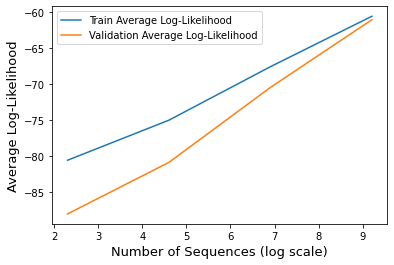

In [11]:
import numpy as np

Sequences = [10, 100, 1000, 10000]
Sequences = np.log(Sequences)
Train = [-80.54, -74.99, -67.59, -60.61]
Validation = [-87.97, -80.83, -70.46, -61.09]

import matplotlib.pyplot as plt

plt.plot(Sequences,Train,label = "Train Average Log-Likelihood")
plt.plot(Sequences,Validation, label = "Validation Average Log-Likelihood")

plt.xlabel("Number of Sequences (log scale)",fontsize=13)
plt.ylabel("Average Log-Likelihood",fontsize=13)
plt.legend()
plt.show()